# CASE STUDY: FASHION CLASS CLASSIFICATION 
# Dr. Ryan Ahmed

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

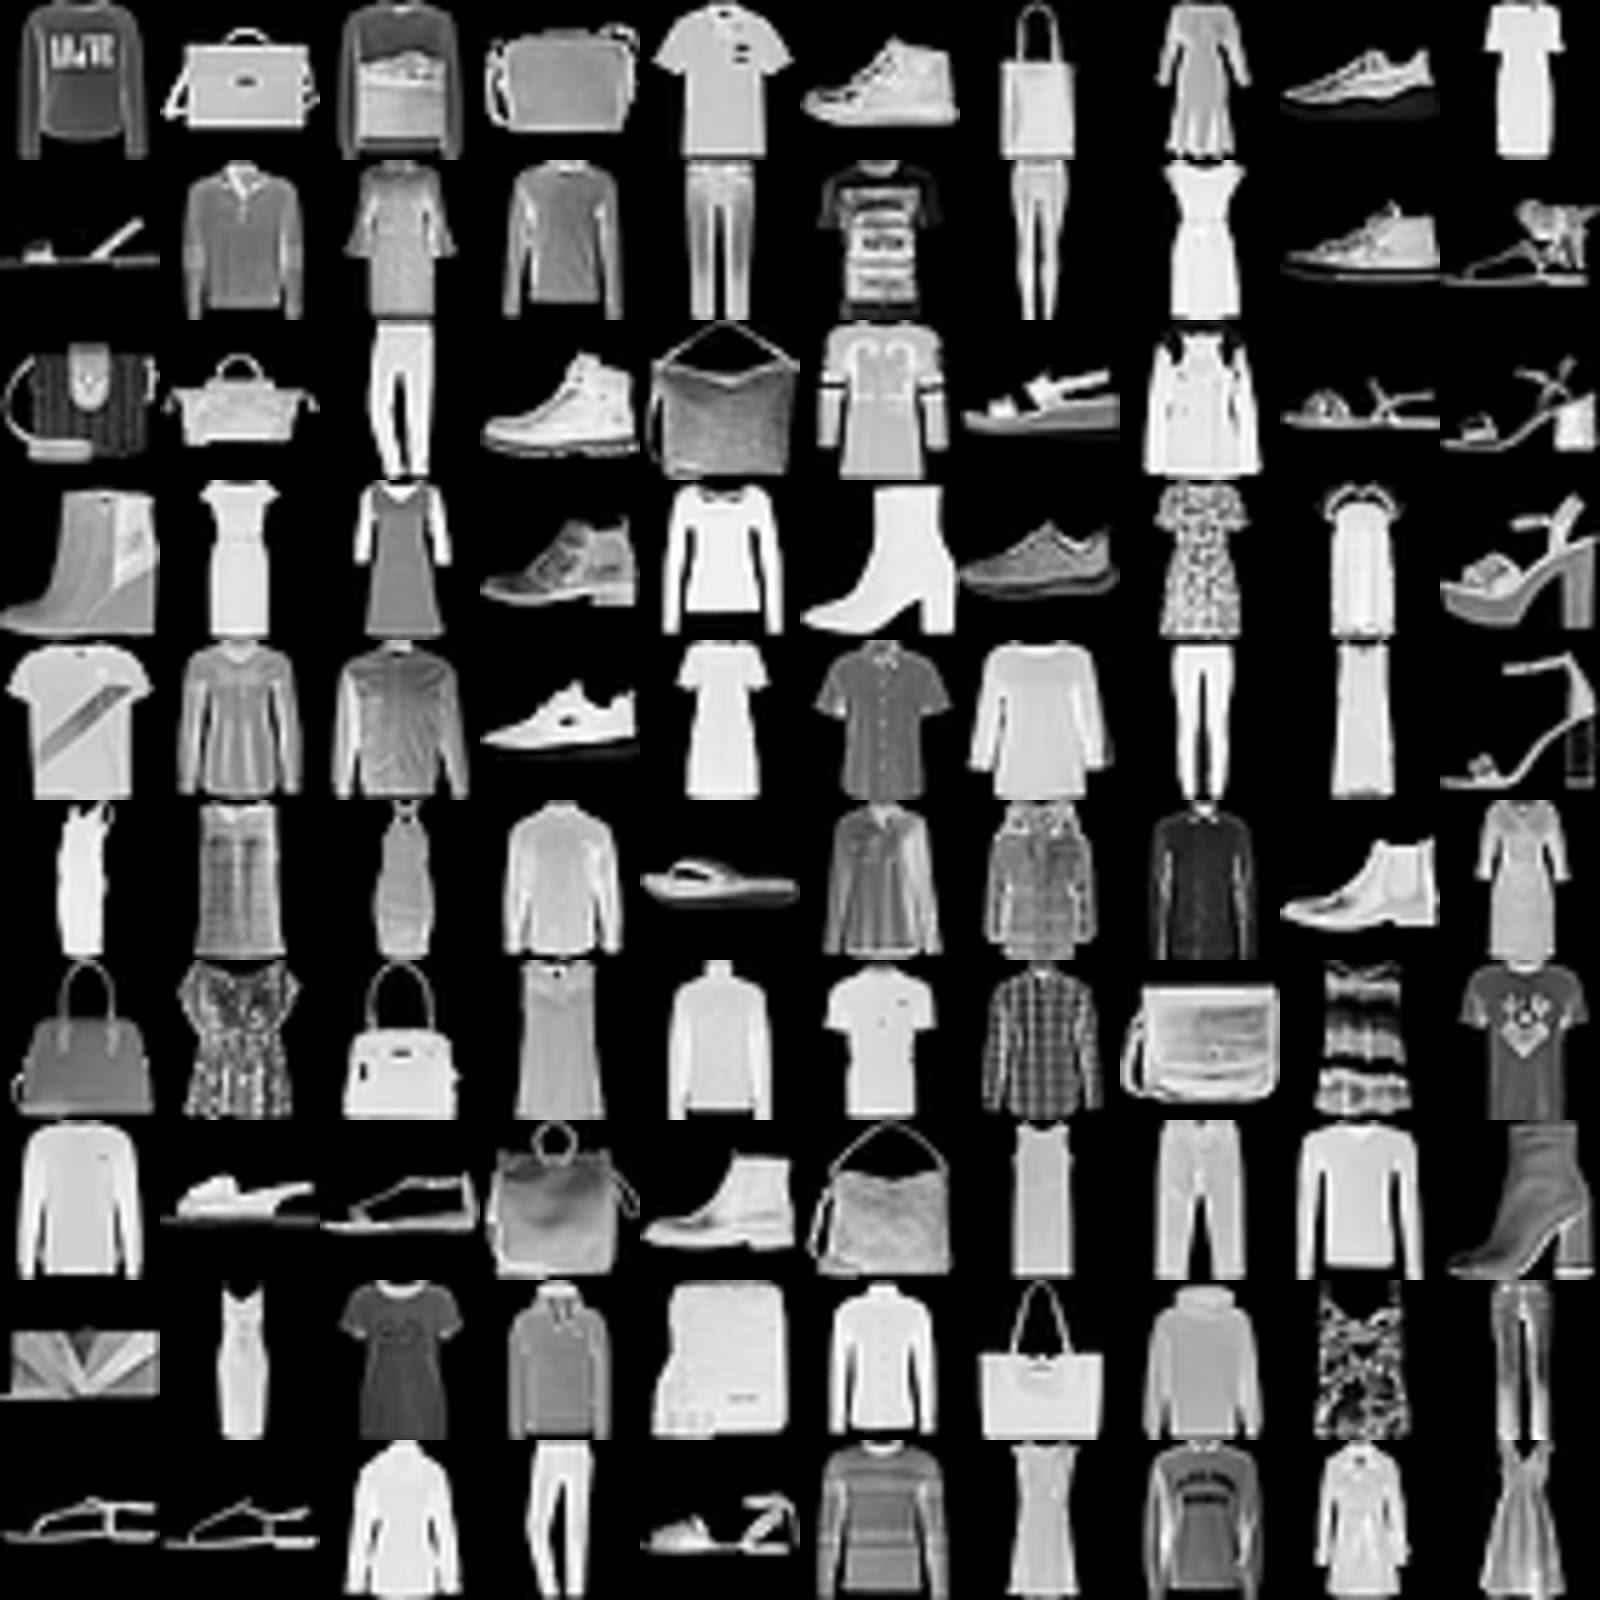


# STEP #2: IMPORTING DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

# STEP #3: VISUALIZATION OF THE DATASET  

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.shape
fashion_test_df.shape

(10000, 785)

In [5]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

In [6]:
print(training, testing)

[[2. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 1. 0.]
 [8. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


5.0

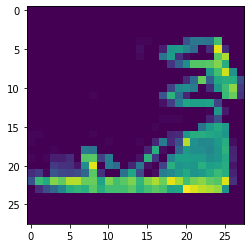

In [7]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

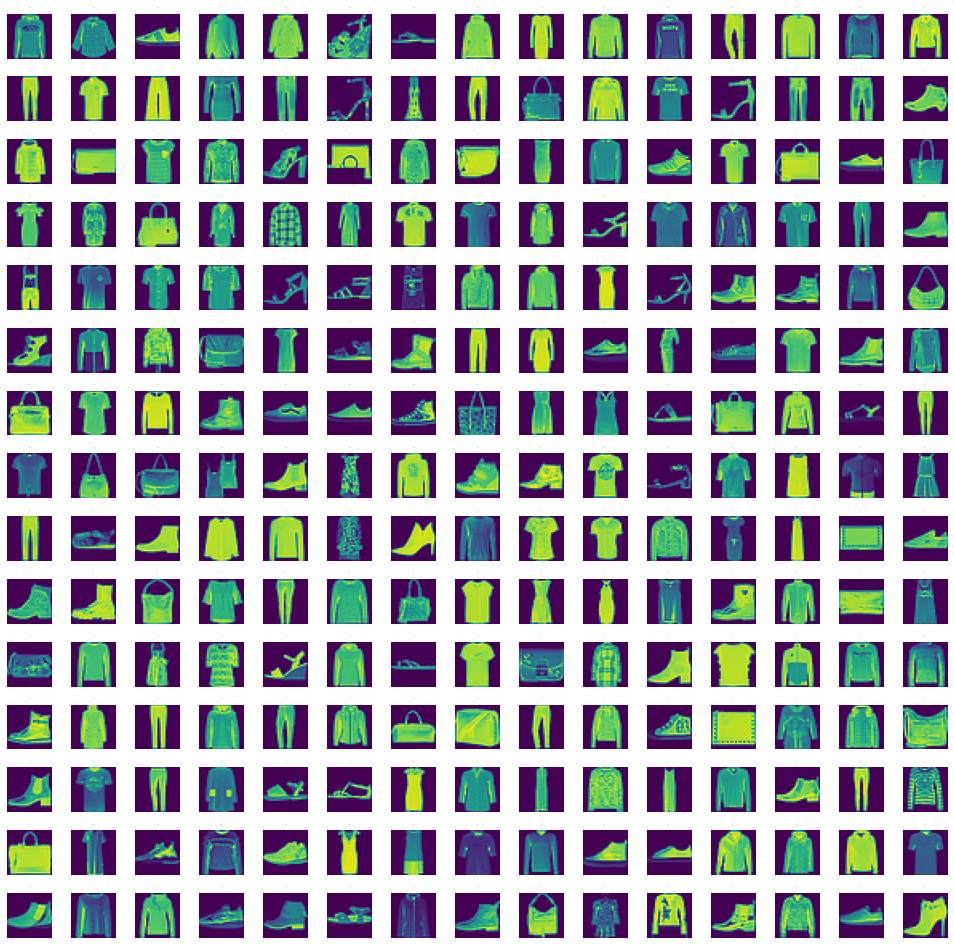

In [8]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)
for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 0)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

# STEP #4: TRAINING THE MODEL

In [9]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [11]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [13]:
cnn = Sequential()

In [14]:
cnn.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

In [15]:
cnn.add(MaxPooling2D(pool_size = (2, 2)))

In [16]:
cnn.add(Flatten())

In [17]:
cnn.add(Dense(32, activation = 'relu'))
cnn.add(Dense(10, activation = 'sigmoid'))

In [18]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [19]:
history = cnn.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = 50,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 1s 16ms/step - loss: 1.5504 - accuracy: 0.4889 - val_loss: 0.8599 - val_accuracy: 0.6973
Epoch 2/50
94/94 [==============================] - 1s 15ms/step - loss: 0.7522 - accuracy: 0.7320 - val_loss: 0.6806 - val_accuracy: 0.7491
Epoch 3/50
94/94 [==============================] - 1s 14ms/step - loss: 0.6463 - accuracy: 0.7668 - val_loss: 0.6358 - val_accuracy: 0.7665
Epoch 4/50
94/94 [==============================] - 1s 14ms/step - loss: 0.5902 - accuracy: 0.7866 - val_loss: 0.5849 - val_accuracy: 0.7913
Epoch 5/50
94/94 [==============================] - 1s 13ms/step - loss: 0.5579 - accuracy: 0.7986 - val_loss: 0.5444 - val_accuracy: 0.8047
Epoch 6/50
94/94 [==============================] - 1s 13ms/step - loss: 0.5294 - accuracy: 0.8092 - val_loss: 0.5332 - val_accuracy: 0.8054
Epoch 7/50
94/94 [==============================] - 1s 13ms/step - loss: 0.5103 - accuracy: 0.8157 - val_loss: 0.5173 - val_accuracy: 0.8092
Epoch 8/50
94

# STEP #5: EVALUATING THE MODEL

In [20]:
eval = cnn.evaluate(X_test, y_test)
print('Test Accuracy {:.3f}'.format(eval[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8681
Test Accuracy 0.868


In [21]:
predicted_classes = cnn.predict_classes(X_test)
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

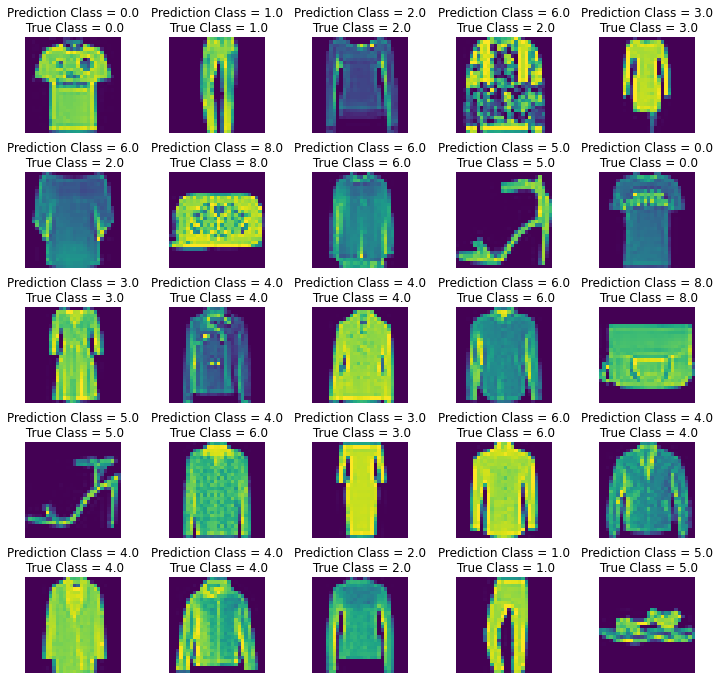

In [22]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


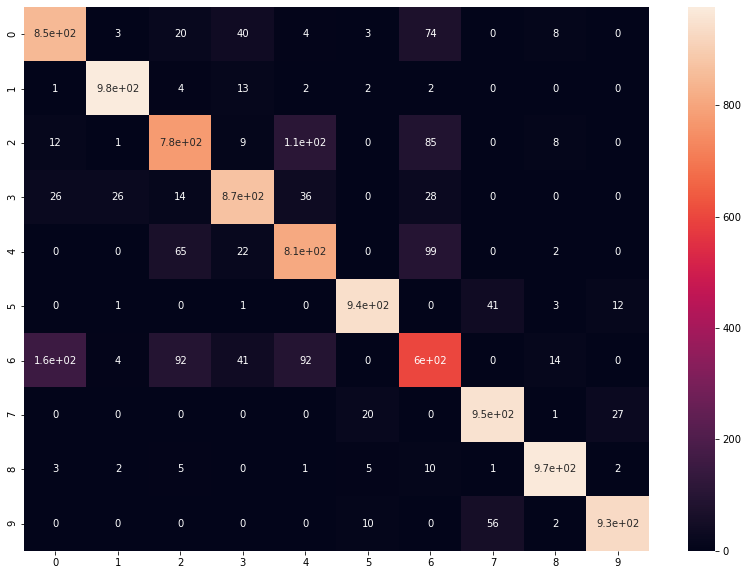

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [24]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.85      0.83      1000
     Class 1       0.96      0.98      0.97      1000
     Class 2       0.80      0.78      0.79      1000
     Class 3       0.87      0.87      0.87      1000
     Class 4       0.77      0.81      0.79      1000
     Class 5       0.96      0.94      0.95      1000
     Class 6       0.67      0.60      0.63      1000
     Class 7       0.91      0.95      0.93      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.96      0.93      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

